In [1]:
import sys
sys.path.append("../../")
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from _bnn import BNN

import warnings
warnings.filterwarnings("ignore", message="Found non-auxiliary vars in guide but not model")
sys.path.append("../../")

In [3]:
# set style of graphs
plt.style.use('ggplot')
from pylab import rcParams
plt.rcParams['figure.dpi'] = 100

In [4]:
df = pd.read_csv('../../stock/AAPL.csv', parse_dates=True, index_col='Date').dropna(how="any")
X_train, X_test = train_test_split(df, test_size=0.1, shuffle=False)

In [5]:
features = ['High', 'Low', 'Open', 'Volume']
data = df[features]
data = data.values

In [6]:
predictor = BNN(input_size=4,
                hidden_size=32,
                output_dim=1,
                pretrained=True
                )

predictor.fit(X_train, 
              batch_size=24, 
              epochs=10,
              patience=2
              )

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1, Loss: 65.06878054993493
Epoch 2, Loss: 64.14009587679591
Epoch 3, Loss: 62.05266700206058
Epoch 4, Loss: 60.75872230449958
Epoch 5, Val Loss 3.1570274978876114
Epoch 6, Loss: 57.05160174332559
Epoch 7, Loss: 55.94372820907405
Epoch 8, Loss: 54.010219935993
Epoch 9, Loss: 51.8963818172259
Epoch 10, Val Loss 2.714864415427049


In [7]:
y_pred = predictor.predict(X_test)
y_test = (X_test['Close']).values.reshape(-1,1)

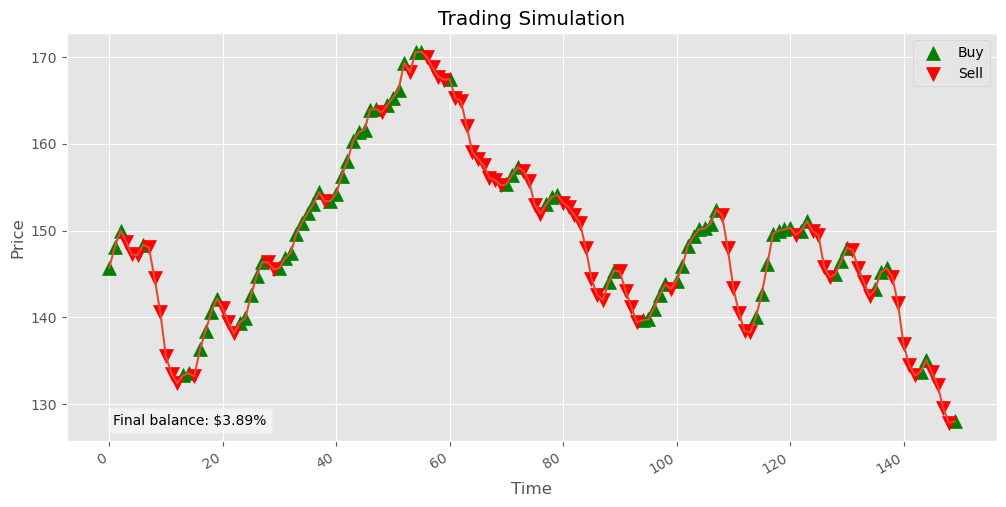

In [9]:
balance, total_profit_loss, percentage_increase, transactions = predictor.trading(predicted=y_pred,
                                                real=y_test,
                                                shares=2,
                                                initial_balance=1000,
                                                stop_loss=0.03,
                                                threshold=0.02,
                                                plot=True
                                                )